In [25]:
import pandas as pd
import os
import zipfile
import requests
import datetime
from matplotlib import pyplot as plt

In [26]:
#Directorio de trabajo
os.chdir("C:/Users/claud/Documents/GitHub/dataviz_varios")

In [27]:
url_basica="https://prep2023-tamps.ine.mx/senadurias/nacional/assets/20230219_"

In [28]:
#Obtener la hora actual
hora_actual=datetime.datetime.now().strftime("%H")
if len(str(hora_actual))==1:
    hora_actual="0"+str(hora_actual)
hora_actual

'23'

In [29]:
#Obtener minutos de la hora actual
minutos = datetime.datetime.now().minute
#Redondear hacia la decena inferior
minutos = minutos - minutos%5
#Si largo es 1, agregar un 0 a la izquierda
if len(str(minutos)) == 1:
    minutos = "0" + str(minutos)
    
minutos

20

In [30]:
#Pegar horas y minutos en la url
url = url_basica + str(hora_actual)+str(minutos)+"_PREP_SEN_TAMPS_ext.zip"
url

'https://prep2023-tamps.ine.mx/senadurias/nacional/assets/20230219_2320_PREP_SEN_TAMPS_ext.zip'

In [31]:
#Descarga el archivo utilizando requests
r = requests.get(url, allow_redirects=True)
downloaded_file = open("data.zip", "wb")
downloaded_file.write(r.content)
downloaded_file.close()

#Descomprime el archivo
with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".")

#Eliminar el archivo zip
os.remove("data.zip")

In [32]:
#Leer el archivo csv desde la línea 5
df = pd.read_csv("TAMPS_SEN_FED_ext_2023.csv", skiprows=4)
df.columns=df.columns.str.lower()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   clave_casilla                 4782 non-null   object 
 1   clave_acta                    4782 non-null   object 
 2   id_entidad                    4782 non-null   int64  
 3   entidad                       4782 non-null   object 
 4   id_distrito_federal           4781 non-null   float64
 5   distrito_federal              4781 non-null   object 
 6   seccion                       4781 non-null   float64
 7   id_casilla                    4782 non-null   int64  
 8   tipo_casilla                  4782 non-null   object 
 9   ext_contigua                  4782 non-null   int64  
 10  ubicacion_casilla             4782 non-null   int64  
 11  tipo_acta                     4782 non-null   object 
 12  total_boletas_sobrantes       4782 non-null   object 
 13  tot

In [34]:
#Transformar la columna de voto_calculado a numérica
df["total_votos_calculado"]=pd.to_numeric(df["total_votos_calculado"], errors="coerce")
df["morena"]=pd.to_numeric(df["morena"], errors="coerce")
df["pt-morena"]=pd.to_numeric(df["pt-morena"], errors="coerce")
df["pt"]=pd.to_numeric(df["pt"], errors="coerce")
#Obtener porcentaje de votos de morena y coalición respecto del total
df["pct"]=(df["morena"]+df["pt-morena"]+df["pt"])/df["total_votos_calculado"]*100

In [35]:

pd.set_option("display.max_columns", None)
df.head()

,clave_casilla,clave_acta,id_entidad,entidad,id_distrito_federal,distrito_federal,seccion,id_casilla,tipo_casilla,ext_contigua,ubicacion_casilla,tipo_acta,total_boletas_sobrantes,total_personas_votaron,total_rep_partido_ci_votaron,total_votos_sacados,pan,pri,prd,pvem,pt,morena,pan-pri-prd,pan-pri,pan-prd,pri-prd,pt-morena,no_registradas,nulos,total_votos_asentado,total_votos_calculado,lista_nominal,representantes_pp_ci,observaciones,contabilizada,mecanismos_traslado,codigo_integridad,fecha_hora_acopio,fecha_hora_captura,fecha_hora_verificacion,origen,digitalizacion,tipo_documento,cotejada,pct
0,'280000M0100','280000M01007',28,TAMAULIPAS,NaN,NaN,NaN,1,M,0,1,1,-,-,-,-,-,-,-,-,NaN,NaN,-,-,-,-,NaN,-,-,-,0.0,2481,0,,-,-,-,-,-,-,-,-,-,-,NaN
1,'280749B0100','280749B01002',28,TAMAULIPAS,1.0,Nuevo Laredo,749.0,1,B,0,1,2,450,89,4,93,9,2,0,3,5.0,68.0,0,0,0,0,4.0,0,2,93,93.0,531,17,,1,D,dd9f68be4d093013add9e144db5874a55c5062296d1ea6...,19/02/2023 19:13:28,19/02/2023 22:15:05,19/02/2023 22:15:25,CASILLA,Móvil,Acta PREP,1,82.795699
2,'280749C0100','280749C01002',28,TAMAULIPAS,1.0,Nuevo Laredo,749.0,1,C,0,1,2,473,70,2,Sin dato,7,2,0,1,3.0,49.0,0,0,0,0,3.0,0,5,0,70.0,531,15,,1,F,491dda08246e7700cc9b8a9188f86ff3e8e2f404650f60...,19/02/2023 19:29:58,19/02/2023 21:56:33,19/02/2023 21:56:54,CASILLA,Móvil,Acta PREP,1,78.571429
3,'280749C0200','280749C02002',28,TAMAULIPAS,1.0,Nuevo Laredo,749.0,2,C,0,1,2,460,79,3,82,16,2,1,0,4.0,54.0,0,0,0,0,2.0,0,3,82,82.0,530,6,,1,F,ca2e5b20d417d08f619a1a1e842c7eaabb4bbe9601e54e...,19/02/2023 19:47:49,19/02/2023 21:04:51,19/02/2023 21:05:11,CASILLA,Móvil,Acta PREP,1,73.170732
4,'280749E0100','280749E01002',28,TAMAULIPAS,1.0,Nuevo Laredo,749.0,1,E,0,1,2,-,-,-,-,-,-,-,-,NaN,NaN,-,-,-,-,NaN,-,-,-,0.0,693,14,,-,-,-,-,-,-,-,-,-,-,NaN


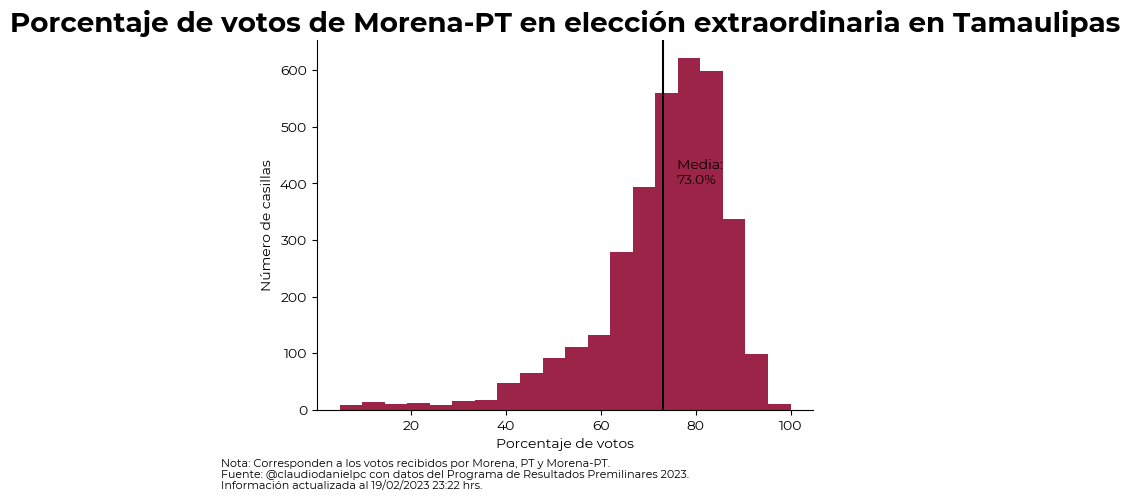

In [36]:
#Hacer histograma de votos de morena
plt.rcParams["font.family"]="Montserrat"

plt.hist(df["pct"], bins=20,color="#9d2449")
plt.title("Porcentaje de votos de Morena-PT en elección extraordinaria en Tamaulipas", fontsize=20, fontweight="bold")
plt.xlabel("Porcentaje de votos")
plt.ylabel("Número de casillas")
"Añadir media y mediana"
plt.axvline(df["pct"].mean(), color="black", label="Media")

#Añadir texto con la media y mediana
plt.text(df["pct"].mean()+3, 400, "Media: \n"+str(round(df["pct"].mean(),1))+"%", color="black")
#Eliminar bordes del gráfico
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

#Añadir texto con fecha y hora de corte de información
plt.text(-20, -140, "Información actualizada al "+datetime.datetime.now().strftime("%d/%m/%Y %H:%M")+" hrs.", fontsize=8)
#Añadir fuente
plt.text(-20, -120, "Fuente: @claudiodanielpc con datos del Programa de Resultados Premilinares 2023.", fontsize=8)
#Añadir nota
plt.text(-20, -100, "Nota: Corresponden a los votos recibidos por Morena, PT y Morena-PT.", fontsize=8)

#Salvar gráfico
plt.savefig("morena_tmps.png", bbox_inches="tight", dpi=300)